In [1]:
# Imports
import praw
import os
import requests
import pandas as pd
import json
import datetime as dt
import numpy as np
from pathlib import Path
from praw.models import MoreComments
from datetime import datetime
import json
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


Bad key savefig.frameon in file /Users/mikhararamsing/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/mikhararamsing/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/mikhararamsing/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.

# ASX 200

In [2]:
# Set the file path
asx200_path=Path("asx200_historical.csv")

# Reading the data
asx200_df=pd.read_csv(asx200_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
asx200_df.index = asx200_df.index.date
asx200_df = asx200_df.sort_index()

# Ensuring data loaded correctly
asx200_df.head()

,Close
2011-05-20,4732.2
2011-05-23,4643.0
2011-05-24,4628.8
2011-05-25,4584.7
2011-05-26,4660.2


In [3]:
asx = pd.read_csv('asx_comments_with_sentiment.csv')
asx2 = pd.read_csv('asx_comments_new.csv')
asx['net_sentiment'] = asx['positive'] - asx['negative']
asx_merge = pd.merge(asx, asx2, on='comment', how='left')
asx_merge.dropna()
dates = []
for time in asx_merge['utc']:
    dates.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))


In [4]:
asx_merge['Date'] = dates

In [9]:
asx_merge.index = asx_merge['Date']
asx_merge['Date'] = pd.to_datetime(asx_merge['Date'], utc=True)

In [17]:
asx_merge.index = asx_merge.index.date

AttributeError: 'Index' object has no attribute 'date'

In [18]:

asx_merge_grouped = (asx_merge[['net_sentiment']].groupby(asx_merge.index).mean())

<AxesSubplot:>

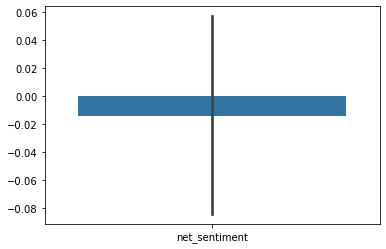

In [19]:
sns.barplot(data = asx_merge_grouped)